In [1]:
#Author-Vishal Burman

In [2]:
#Importing the relevant libraries

import os, shutil
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import adam
from keras.applications import VGG16

c:\users\vishal\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Specify the base directory

base_dir="cats_and_dog_small/"

In [4]:
#Specifying the Training, Validation and Test directory

train_dir=os.path.join(base_dir, 'train')
validation_dir=os.path.join(base_dir, 'valid')
test_dir=os.path.join(base_dir, 'test')

train_cats_dir=os.path.join(train_dir, 'cats')
train_dogs_dir=os.path.join(train_dir, 'dogs')

validation_cats_dir=os.path.join(validation_dir, 'cats')
validation_dogs_dir=os.path.join(validation_dir, 'dogs')

test_cats_dir=os.path.join(test_dir, 'cats')
test_dogs_dir=os.path.join(test_dir, 'dogs')

In [5]:
#Instantiating the VGG16 Convolution Base

conv_base=VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

In [ ]:
"""

include_top: we do not intend to include the 1000 classes of ImageNet since we are working on custom dataset
             therefore we won't include it.

weights: we import the weights of the VGG16 trained on ImageNet dataset

"""

In [6]:
#Adding a densely connected classifier on top of the Convolution base

model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
#Model Summary

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Freezing the VGG16 model(This is done so that we don't lost the ImageNet weights)

In [10]:
conv_base.trainable=False

In [11]:
#Training the model end-to-end with a frozen convolution base

In [12]:
#Configuring the Data Augmentation of the model

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
#Compiling the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
#Fitting the model

history=model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50, workers=8)

Epoch 1/30
100/100 [==============================] - 22s 217ms/step - loss: 0.5545 - acc: 0.7440 - val_loss: 0.3541 - val_acc: 0.8370
Epoch 2/30
100/100 [==============================] - 19s 193ms/step - loss: 0.3895 - acc: 0.8245 - val_loss: 0.3053 - val_acc: 0.8570
Epoch 3/30
100/100 [==============================] - 19s 193ms/step - loss: 0.3669 - acc: 0.8305 - val_loss: 0.2610 - val_acc: 0.8930
Epoch 4/30
100/100 [==============================] - 19s 194ms/step - loss: 0.3362 - acc: 0.8490 - val_loss: 0.2856 - val_acc: 0.8820
Epoch 5/30
100/100 [==============================] - 19s 194ms/step - loss: 0.3352 - acc: 0.8500 - val_loss: 0.2569 - val_acc: 0.8880
Epoch 6/30
100/100 [==============================] - 19s 194ms/step - loss: 0.3123 - acc: 0.8690 - val_loss: 0.3175 - val_acc: 0.8520
Epoch 7/30
100/100 [==============================] - 19s 194ms/step - loss: 0.3097 - acc: 0.8615 - val_loss: 0.2604 - val_acc: 0.8870
Epoch 8/30
100/100 [==============================] - 1

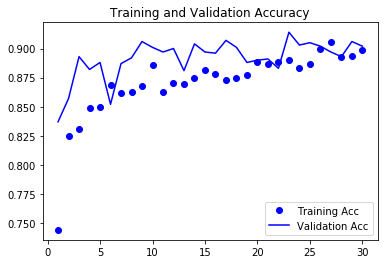

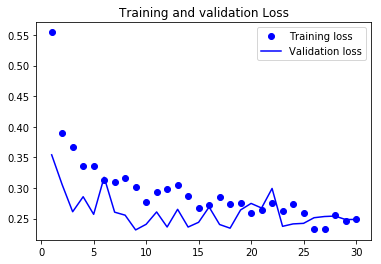

In [17]:
#Displaying the curves of loss and accuracy during training

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend()

In [ ]:
"""

The training and validation on our small dataset proved to much more efficient and with less epochs when we
use a predefined Convolution Network like VGG16.

"""